In [1]:
import folium
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
DIR='./대구광역시 일별 충전기별 사용현황_20220531.csv'
DIR1='./대구광역시_전기차충전소_20190627.csv'
DIR2='./한국전력공사_충전소의 위치 및 현황 정보_20201008.xlsx'
DIR3='./대구시 전기차 보급현황.csv'
DIR4='./대구시 충전소 현황.csv'

In [3]:
df=pd.read_csv(DIR, encoding='cp949')
df1=pd.read_csv(DIR1, encoding='cp949')
# df2=pd.read_csv(DIR2, 'rt', encoding='UTF8')

In [4]:
df.head(10)

,일자,충전소ID,충전소명칭,위도,경도,충전기ID,충전기타입,사용횟수,충전량
0,2022-05-31,27110001,국채보상운동기념공원주차장,35.868863,128.600299,1,완속,3,110.59
1,2022-05-31,27110001,국채보상운동기념공원주차장,35.868863,128.600299,2,완속,1,22.38
2,2022-05-31,27110001,국채보상운동기념공원주차장,35.868863,128.600299,3,완속,3,20.13
3,2022-05-31,27110002,대구시청,35.871039,128.601444,1,급속,6,119.40
4,2022-05-31,27110002,대구시청,35.871039,128.601444,2,완속,5,32.35
5,2022-05-31,27110003,서문주차빌딩,35.868986,128.581015,1,급속,5,61.43
6,2022-05-31,27110003,서문주차빌딩,35.868986,128.581015,2,완속,5,32.23
7,2022-05-31,27110003,서문주차빌딩,35.868986,128.581015,3,완속,2,13.30
8,2022-05-31,27110009,동인동행정복지센터,35.867832,128.609096,1,완속,2,70.97
9,2022-05-31,27140001,갓바위공영3주차장,35.970269,128.725839,1,완속,1,1.19


In [5]:
df1.head()

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,급속충전타입구분,완속충전기대수,급속충전기대수,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자
0,DTC섬유박물관,지하1층 T6,대구광역시,연중무휴,00:00,00:00,N,Y,DC차데모+AC3상+DC콤보,0,1,N,대구광역시 동구 팔공로 227,대구광역시 동구 봉무동 1560-1,대구환경공단,053-605-8060,35.919316,128.640135,2019-06-27
1,갓바위공영3주차장,입구 우측,대구광역시,연중무휴,07:00,20:00,Y,N,NaN,3,0,Y,대구광역시 동구 갓바위로 227,대구광역시 동구 진인동 123-74,대구환경공단,053-605-8060,35.970881,128.726168,2019-06-27
2,갓바위공영5주차장,입구 우측,대구광역시,연중무휴,07:00,20:00,N,Y,DC차데모+AC3상+DC콤보,0,1,Y,대구광역시 동구 진인동 123-38,대구광역시 동구 진인동 123-38,대구환경공단,053-605-8060,35.969378,128.726065,2019-06-27
3,국채보상운동기념공원주차장,지하 1층 우측,대구광역시,연중무휴,00:00,00:00,Y,N,NaN,3,0,Y,대구광역시 중구 공평로10길 25,대구광역시 중구 동인동2가 42-1,대구환경공단,053-605-8060,35.868440,128.601715,2019-06-27
4,논공읍 논공공단출장소,입구 좌측,대구광역시,연중무휴,00:00,00:00,N,Y,DC차데모+AC3상+DC콤보,0,1,N,대구광역시 달성군 논공읍 논공중앙로 33길 3,대구광역시 달성군 논공읍 북리 1-130,대구환경공단,053-605-8060,35.730040,128.452781,2019-06-27


In [6]:
df.columns

Index(['일자', '충전소ID', '충전소명칭', '위도', '경도', '충전기ID', '충전기타입', '사용횟수', '충전량'], dtype='object')

In [7]:
df1.columns

Index(['충전소명', '충전소위치상세', '설치시도명', '휴점일', '이용가능시작시각', '이용가능종료시각', '완속충전가능여부',
       '급속충전가능여부', '급속충전타입구분', '완속충전기대수', '급속충전기대수', '주차료부과여부', '소재지도로명주소',
       '소재지지번주소', '관리업체명', '관리업체전화번호', '위도', '경도', '데이터기준일자'],
      dtype='object')

In [8]:
df=df[['충전소명칭','위도','경도']]
df.columns=['충전소명','위도','경도']

In [9]:
df.head()

,충전소명,위도,경도
0,국채보상운동기념공원주차장,35.868863,128.600299
1,국채보상운동기념공원주차장,35.868863,128.600299
2,국채보상운동기념공원주차장,35.868863,128.600299
3,대구시청,35.871039,128.601444
4,대구시청,35.871039,128.601444


In [10]:
df1=df1[['충전소명','위도','경도']]
df1.head()

,충전소명,위도,경도
0,DTC섬유박물관,35.919316,128.640135
1,갓바위공영3주차장,35.970881,128.726168
2,갓바위공영5주차장,35.969378,128.726065
3,국채보상운동기념공원주차장,35.868440,128.601715
4,논공읍 논공공단출장소,35.730040,128.452781


In [11]:
alldf=pd.concat([df,df1],axis=0)
alldf

,충전소명,위도,경도
0,국채보상운동기념공원주차장,35.868863,128.600299
1,국채보상운동기념공원주차장,35.868863,128.600299
2,국채보상운동기념공원주차장,35.868863,128.600299
3,대구시청,35.871039,128.601444
4,대구시청,35.871039,128.601444
...,...,...,...
112,아이빌,35.902056,128.576936
113,아주운수,35.896375,128.640599
114,대구 지식서비스센터 앞,35.873307,128.624832
115,달성문화센터,35.865271,128.460701


In [12]:
alldf.isnull().sum()

충전소명    0
위도      0
경도      0
dtype: int64

In [13]:
alldf.duplicated()

0      False
1       True
2       True
3      False
4       True
       ...  
112    False
113    False
114    False
115    False
116    False
Length: 295381, dtype: bool

In [14]:
alldf[['위도','경도']]

,위도,경도
0,35.868863,128.600299
1,35.868863,128.600299
2,35.868863,128.600299
3,35.871039,128.601444
4,35.871039,128.601444
...,...,...
112,35.902056,128.576936
113,35.896375,128.640599
114,35.873307,128.624832
115,35.865271,128.460701


In [15]:
alldf1=alldf.drop_duplicates(['위도','경도'], keep='first')
alldf1

,충전소명,위도,경도
0,국채보상운동기념공원주차장,35.868863,128.600299
3,대구시청,35.871039,128.601444
5,서문주차빌딩,35.868986,128.581015
8,동인동행정복지센터,35.867832,128.609096
9,갓바위공영3주차장,35.970269,128.725839
...,...,...,...
112,아이빌,35.902056,128.576936
113,아주운수,35.896375,128.640599
114,대구 지식서비스센터 앞,35.873307,128.624832
115,달성문화센터,35.865271,128.460701


In [16]:
alldf1['충전소명']=='국채보상운동기념공원주차장'

0       True
3      False
5      False
8      False
9      False
       ...  
112    False
113    False
114    False
115    False
116    False
Name: 충전소명, Length: 315, dtype: bool

In [17]:
alldf2=alldf1.drop_duplicates(['충전소명'], keep='first')
alldf2

,충전소명,위도,경도
0,국채보상운동기념공원주차장,35.868863,128.600299
3,대구시청,35.871039,128.601444
5,서문주차빌딩,35.868986,128.581015
8,동인동행정복지센터,35.867832,128.609096
9,갓바위공영3주차장,35.970269,128.725839
...,...,...,...
101,동구 해안동 행정복지센터,35.882076,128.671680
102,남구 대명5동 행정복지센터,35.843234,128.587829
103,북구 구암동 행정복지센터,35.938923,128.566044
114,대구 지식서비스센터 앞,35.873307,128.624832


In [18]:
alldf2=alldf2.sort_index(ascending=True)
alldf2=alldf2.reset_index(drop=True)
alldf2

,충전소명,위도,경도
0,국채보상운동기념공원주차장,35.868863,128.600299
1,대구시청,35.871039,128.601444
2,서문주차빌딩,35.868986,128.581015
3,동인동행정복지센터,35.867832,128.609096
4,갓바위공영3주차장,35.970269,128.725839
...,...,...,...
250,대구시_고산2동 행정복지센터,35.843449,128.695181
251,대구시_도동 측백향커뮤니티센터,35.919051,128.662238
252,대구시_수성소방서,35.825251,128.644448
253,대구시_태전공원,35.931466,128.544637


In [19]:
print(len(alldf2))

255


In [20]:
name1 = []
for i in range(len(alldf2)):
    name1.append(alldf2['충전소명'][i])

print(name1)

['국채보상운동기념공원주차장', '대구시청', '서문주차빌딩', '동인동행정복지센터', '갓바위공영3주차장', '갓바위공영5주차장', '동구청', '동대구복합환승센터', '두류공원', '율하체육공원3주차장', '첨단의료산업진흥재단', '환경공단안심관리소', 'DTC섬유박물관', '반야월공영주차장', '파계사 공영주차장', '해안동 행정복지센터', '동촌유원지 입구 주차장', '대구지식서비스센터', '상공회의소', '신암공원', '시지근린공원', '아양아트센터', '불로봉무동행정복지센터', '대구의료원', '서구국민체육센터', '서구청', '차량등록사업소', '충전인프라 관제센터', '대구환경공단(달서천)', '상중이동 행정복지센터', '서대구산업단지 근로자복지회관', '상중이동행정복지센터', '비산1동행정복지센터', '평리3동행정복지센터', '충혼탑 주차장', '복현장미공원', '대명5동 행정복지센터', '이천동행정복지센터', '봉덕2동행정복지센터', '대명9동행정복지센터', '농수산물도매시장', '다사읍사무소', '매천역환승공영주차장', '중구청', '대신동 행정복지센터', '북구청', '신암2동 행정복지센터', '효목1동 행정복지센터', '시청별관', '도평동 행정복지센터', '동촌동 행정복지센터', '패션센터 주차장', '방촌동 행정복지센터', '관음공영주차장', '안심3.4동 행정복지센터', '대구 부광교회', '남구청', '구암동 행정복지센터', '봉덕3동 행정복지센터', '대명2동 행정복지센터', '한국도로공사 칠곡영업소', '대명3동 행정복지센터', '유니버시아드 레포츠센터', '대명4동 행정복지센터', '아이빌', '고성동 행정복지센터', '대구체육관 주차장', '산격3동 행정복지센터', '대구은행 제2본점영업부', '무태조야동 행정복지센터', '대구사격장', '태전1동 행정복지센터', '동림플라자', '황금1동 행정복지센터', '동천동행정복지센터', '관음동행정복지센터', '본리동 행정복지센터', '검단동행정복지센터', '죽전동 행정복지센터',

In [21]:
a=int(input(f'숫자: '))
b=name1[a]
print(b)
print(alldf2[alldf2['충전소명']==b][['위도','경도']])
print('---------------------------------------------------')
if a == 255:
    print('end')

숫자: 0
국채보상운동기념공원주차장
          위도          경도
0  35.868863  128.600299
---------------------------------------------------


In [22]:
m1 = folium.Map(location=[35.868863,128.600299], zoom_strat=14)

for i in range(len(alldf2)):
    folium.Marker([alldf2.iloc[i,1],alldf2.iloc[i,2]]).add_to(m1)

m1

In [23]:
alldf2[alldf2['충전소명'].str.contains('태전')]

,충전소명,위도,경도
71,태전1동 행정복지센터,35.924093,128.543332
213,대구시_태전1동 행정복지센터,35.924071,128.543235
248,대구시_태전2동,35.921467,128.548776
253,대구시_태전공원,35.931466,128.544637


In [24]:
alldf2['충전소명'].unique()

array(['국채보상운동기념공원주차장', '대구시청', '서문주차빌딩', '동인동행정복지센터', '갓바위공영3주차장',
       '갓바위공영5주차장', '동구청', '동대구복합환승센터', '두류공원', '율하체육공원3주차장',
       '첨단의료산업진흥재단', '환경공단안심관리소', 'DTC섬유박물관', '반야월공영주차장', '파계사 공영주차장',
       '해안동 행정복지센터', '동촌유원지 입구 주차장', '대구지식서비스센터', '상공회의소', '신암공원',
       '시지근린공원', '아양아트센터', '불로봉무동행정복지센터', '대구의료원', '서구국민체육센터', '서구청',
       '차량등록사업소', '충전인프라 관제센터', '대구환경공단(달서천)', '상중이동 행정복지센터',
       '서대구산업단지 근로자복지회관', '상중이동행정복지센터', '비산1동행정복지센터', '평리3동행정복지센터',
       '충혼탑 주차장', '복현장미공원', '대명5동 행정복지센터', '이천동행정복지센터', '봉덕2동행정복지센터',
       '대명9동행정복지센터', '농수산물도매시장', '다사읍사무소', '매천역환승공영주차장', '중구청',
       '대신동 행정복지센터', '북구청', '신암2동 행정복지센터', '효목1동 행정복지센터', '시청별관',
       '도평동 행정복지센터', '동촌동 행정복지센터', '패션센터 주차장', '방촌동 행정복지센터', '관음공영주차장',
       '안심3.4동 행정복지센터', '대구 부광교회', '남구청', '구암동 행정복지센터', '봉덕3동 행정복지센터',
       '대명2동 행정복지센터', '한국도로공사 칠곡영업소', '대명3동 행정복지센터', '유니버시아드 레포츠센터',
       '대명4동 행정복지센터', '아이빌', '고성동 행정복지센터', '대구체육관 주차장', '산격3동 행정복지센터',
       '대구은행 제2본점영업부', '무태조야동 행정복지센터', '대구사격장', '

In [25]:
juso=input('충전소명을 입력하세요 : ')
name=alldf2[alldf2['충전소명'].str.contains(juso)]
m1 = folium.Map(location=[35.868863,128.600299], zoom_strat=14)

for i in range(len(name)):
    folium.Marker([name.iloc[i,1],name.iloc[i,2]],tooltip=name.iloc[i,0]).add_to(m1)

m1

충전소명을 입력하세요 : 대구시


## 크롤링

In [26]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

In [27]:
# # 네이버 페이지 공연 크롤링
# genre1 = []

# for i in range(11):
#     print(f'{i}페이지 분석중....')
#     url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EA%B3%B5%EC%97%B0&research_url=&sm=tab_pge&start={i*15+1}&where=web')
#     html1 = requests.get(url1)
#     bs = BeautifulSoup(html1.text, 'lxml')
#     bs2 = bs.find('div', {'class':'api_txt_lines'}).get_text()
#     genre1.append(bs2)

In [28]:
# 네이버 페이지 전기차충전소 크롤링
naver1 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EC%A0%84%EA%B8%B0%EC%B0%A8%EC%B6%A9%EC%A0%84%EC%86%8C%EB%B6%80%EC%A1%B1&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs = BeautifulSoup(html1.text, 'lxml')
    bs1 = bs.find('div', {'class':'api_txt_lines'}).get_text()
    naver1.append(bs1)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [29]:
print(naver1)

['제네시스 전용 충전소에서 무선 충전 중인 차량과 충전기. [사진 현대차] 전국에 전기차 충전기가 10만 대를 넘어섰지만 여전히 충전기 부족을 호소하는 목소리가 높은 것으로 나타났다. 특히 전기차 구매자 중심으로 아파트 단지 내... ', '전기차 시장이 활성화되면서 전기차 운전자가 늘어나고 있다. 하지만 충전소는 아직 부족하고 공동주택 위주인 우리나라에서 자유롭게 개인 충전기를 설치하는 것은 어려운 현실이다. 개인용 충전기 설치가 힘든 대부분의 운전자들은 완속충전 대비 8배 이상 빠른 급속 충전을 이용해 문제를 해결해 주고 있지만, 급속충전으로 배터리에 무리가...', '전기차 충전소가 부족해? SK네트웍스가 넓혀볼게! 여러분, 혹시 테슬라하면 무엇이 가장 먼저 떠오르시나요? 저는 전기차가 가장 먼저 떠오르는데요. 배우 유아인씨가 모 프로그램에 나와 문이 위로 열리는 차..', '▲ 전기차 충전 모습.ⓒ픽사베이 친환경적이라 평가받는 전기차를 충전하기 위한 충전소가 늘어나고 있지만, 충전기 높이가 너무 높거나 좁은 간격으로 휠체어 이용 장애인은... 그들은 운전 시 느끼는 큰 어려움 중 2순위(8.2%)로 ‘편의시설 부족’을 꼽았다. 환경부의 ‘전기자동차 충전인프라 설치·운영 지침’에는 주차면적을 제외하고 충전기 높이나 볼라드(차량... ', '⑦전기차 정책, C학점...완속충전 인프라 대책 부족 국내 전기차 판매 대수는 계속 늘어나고 있지만 여기에 대응할 수 있는 완속충전 인프라 확대 대책은 여전히 부족하다는 게 전문가들의 대체적인 견해다. 국내 자동차 분석 기관 카이즈유 자료에 따르면 지난해 국내 전기차 신차 등록대수는 3만5천46대로 전년 누계 대비 12.4% 올랐다. 장거리 전기차에 대한... 뉴... ', '전기차 충전소 부족한데 요금은 오르고…차주들 어쩌나 2021-07-13 | 68 전기차 충전 요금 7월 12일부터 37.2원 인상 사진=게티이미지뱅크 하반기 전기차 이용자들의 충전 비용이 15~21%가량 인상된다. 충전소 부족이 여전한 상황에서 

In [30]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in naver1:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [31]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(35)
tags

[('충전', 27),
 ('전기차', 26),
 ('충전기', 12),
 ('소', 8),
 ('설치', 8),
 ('부족', 5),
 ('완', 5),
 ('급속', 5),
 ('운전자', 4),
 ('개인', 4),
 ('국내', 4),
 ('요금', 4),
 ('인상', 4),
 ('길동', 4),
 ('현대차', 3),
 ('것', 3),
 ('대비', 3),
 ('이용', 3),
 ('네트웍', 3),
 ('스', 3),
 ('인프라', 3),
 ('정책', 3),
 ('주유소', 3),
 ('차량', 2),
 ('사진', 2),
 ('중심', 2),
 ('시장', 2),
 ('활성화', 2),
 ('공동', 2),
 ('주택', 2),
 ('위주', 2),
 ('우리나라', 2),
 ('현실', 2),
 ('용', 2),
 ('대부분', 2)]

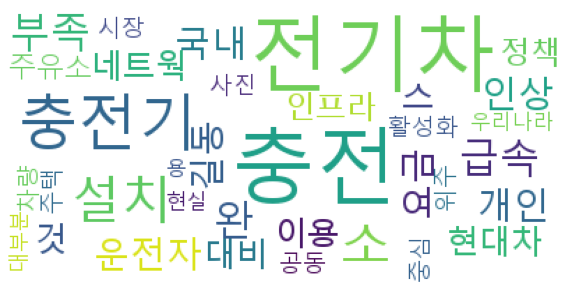

In [32]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

## 워드클라우드
- https://doitgrow.com/m/34

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [34]:
with open('전기.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

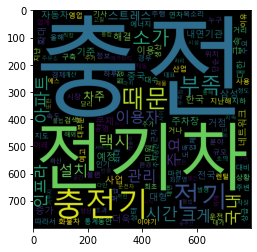

In [35]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

## 전기차 보급 및 충전소 현황

In [36]:
elecar=pd.read_csv(DIR3, encoding='utf-8')
eleeee=pd.read_csv(DIR4, encoding='utf-8')

In [37]:
elecar

,계(대),17년,18년,19년,20년,21년,22년
0,년도별,2257.0,5540.0,6139.0,3941.0,6893.0,9705.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
elecar.isnull().sum()
elecar=elecar.dropna()

In [39]:
elecar

,계(대),17년,18년,19년,20년,21년,22년
0,년도별,2257.0,5540.0,6139.0,3941.0,6893.0,9705.0


In [40]:
elecar.columns=['연도별','2017년','2018년','2019년','2020년','2021년','2022년']
elecar

,연도별,2017년,2018년,2019년,2020년,2021년,2022년
0,년도별,2257.0,5540.0,6139.0,3941.0,6893.0,9705.0


In [41]:
elecar1=elecar.iloc[:,1:]
elecar1

,2017년,2018년,2019년,2020년,2021년,2022년
0,2257.0,5540.0,6139.0,3941.0,6893.0,9705.0


In [42]:
#elecar=elecar.set_index('연도별', inplace=True)
#elecar2=elecar.reset_index()

In [43]:
elecar1.iloc[0,:]

2017년    2257.0
2018년    5540.0
2019년    6139.0
2020년    3941.0
2021년    6893.0
2022년    9705.0
Name: 0, dtype: float64

In [44]:
elecar1[:0]

,2017년,2018년,2019년,2020년,2021년,2022년


In [45]:
import matplotlib.pyplot as plt

plt.plot(elecar1[:,0])

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
df.columns=['충전소명','위도','경도']

In [ ]:
eleeee